In [321]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Functions

In [342]:
def percent_change(values):
    """Calculates the % change between the last value
    and the mean of previous values"""
    # Separate the last value and all previous values into variables
    previous_values = values[:-1]
    last_value = values[-1]
    # Calculate the % difference between the last value
    # and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) \
    / np.mean(previous_values)
    return percent_change



# Load Data

In [322]:
fed_df = pd.read_csv('./data/FEDFUNDS.csv', parse_dates=['DATE'])
fed_df.columns = ['date','fedfunds']
fed_df

,date,fedfunds
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
825,2023-04-01,4.83
826,2023-05-01,5.06
827,2023-06-01,5.08
828,2023-07-01,5.12


In [323]:

fed_df.set_index('date', drop=True, inplace=True)
fed_df = fed_df.resample('A', convention='start', kind='period').mean()
fed_df

,fedfunds
date,
1954,1.008333
1955,1.785000
1956,2.728333
1957,3.105000
1958,1.572500
...,...
2019,2.158333
2020,0.375833
2021,0.080000


In [324]:
gdp_df = pd.read_csv('./data/united-states-gdp-growth-rate.csv', skiprows=16, parse_dates=['date'])
gdp_df.columns = ['date','gdp','annual_chng','remove']
gdp_df.drop(labels=['remove','annual_chng'], inplace=True, axis=1)
gdp_df.set_index('date', drop=True, inplace=True)
gdp_df = gdp_df.resample('A', convention='start', kind='period').mean()
gdp_df

,gdp
date,
1961,2.3000
1962,6.1000
1963,4.4000
1964,5.8000
1965,6.4000
...,...
2018,2.9454
2019,2.2944
2020,-2.7678


In [412]:
cpi_df = pd.read_csv('./data/cpi_scrape.csv', dtype = {'Year': float,})
cpi_df = cpi_df[['Year','Annual Avg','Percent Change Annual','Percent Change Avg']]
cpi_df.columns = ['year','cpi','cpi_per_annual','cpi_per_average']
cpi_df = cpi_df[:-3]
cpi_df['year'] = cpi_df['year'].astype('int')
cpi_df.set_index('year', drop=True, inplace=True)
cpi_df

,cpi,cpi_per_annual,cpi_per_average
year,,,
1913,9.900,–,–
1914,10.000,1,1
1915,10.100,2,1
1916,10.900,12.6,7.9
1917,12.800,18.1,17.4
...,...,...,...
2018,251.107,1.9,2.4
2019,255.657,2.3,1.8
2020,258.811,1.4,1.2


In [413]:
long_df = cpi_df.copy()
long_df['year'] = long_df.index

long_df = long_df.melt(id_vars=['year'])
long_df.columns = ['year','variable','value']
long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')

long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      330 non-null    int64  
 1   variable  330 non-null    object 
 2   value     328 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.9+ KB


<Figure size 2000x800 with 0 Axes>

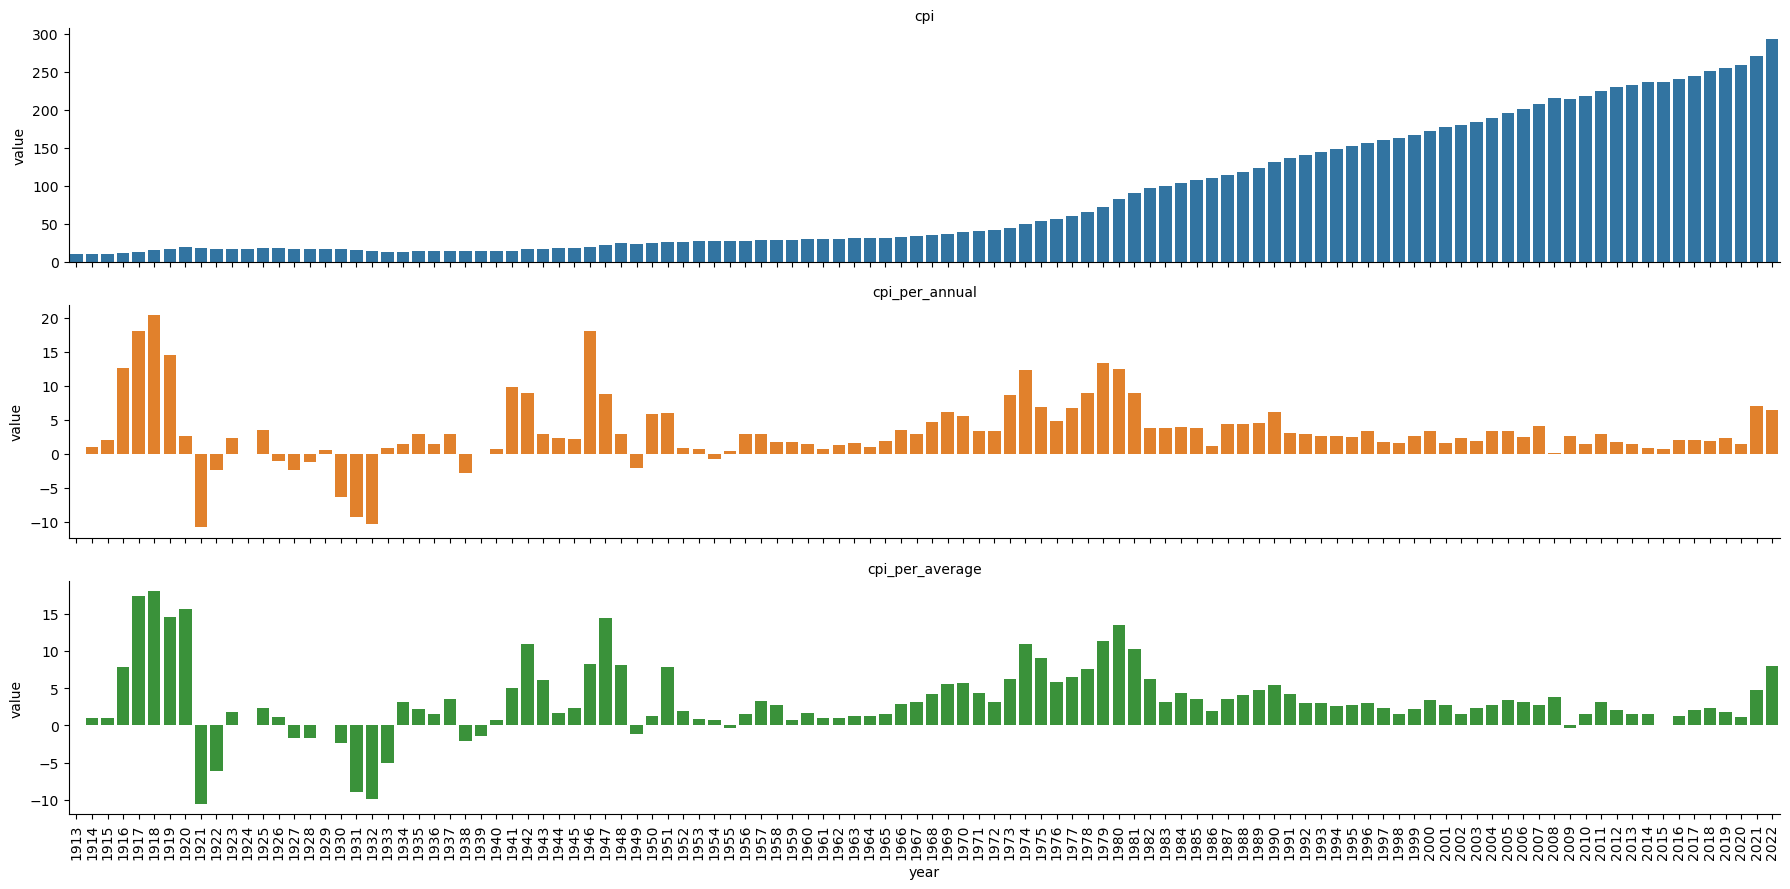

In [414]:
plt.figure(figsize=(20,8))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.map_dataframe(sns.barplot, y="value", x='year')

plt.show()

cpi_df = pd.read_csv('./data/cpi_scrape.csv', dtype = {'Year': str,})
cpi_df = cpi_df[['Year','Change Avg-Avg']]
cpi_df.columns = ['year','cpi']
cpi_df.dropna(subset=['year','cpi'], inplace=True)

cpi_df['date'] = pd.to_datetime(cpi_df['year'], format='%Y')
cpi_df.set_index('date', drop=True, inplace=True)
cpi_df.drop(columns=['year'], inplace=True)

cpi_df = cpi_df.apply (pd.to_numeric, errors='coerce')
cpi_df = cpi_df.resample('A', convention='start', kind='period').mean()

cpi_df

In [331]:
merge_df = fed_df.merge(gdp_df,how ='inner', left_index=True, right_index=True).merge(cpi_df,how ='inner', left_index=True, right_index=True)
merge_df['year'] = merge_df.index.year
merge_df

,fedfunds,gdp,cpi,year
date,,,,
1961,1.955000,2.3000,1.0,1961
1962,2.708333,6.1000,1.0,1962
1963,3.178333,4.4000,1.3,1963
1964,3.496667,5.8000,1.3,1964
1965,4.075000,6.4000,1.6,1965
...,...,...,...,...
2018,1.831667,2.9454,2.4,2018
2019,2.158333,2.2944,1.8,2019
2020,0.375833,-2.7678,1.2,2020


# Merge Data

In [357]:
long_df = merge_df.copy()
#long_df['date'] = long_df.index

long_df = long_df.melt(id_vars=['year'])
long_df.columns = ['year','variable','rate']
long_df

,year,variable,rate
0,1961,fedfunds,1.955000
1,1962,fedfunds,2.708333
2,1963,fedfunds,3.178333
3,1964,fedfunds,3.496667
4,1965,fedfunds,4.075000
...,...,...,...
181,2018,cpi,2.400000
182,2019,cpi,1.800000
183,2020,cpi,1.200000
184,2021,cpi,4.700000


# Graph

Visualling all 3 timeseries on the same line chart with year as the x-axis and rate as the y axis generates an interesting picture of how the 3 rates have moved overtime. 

There are 6 distinct peaks in the federal funds rate. 

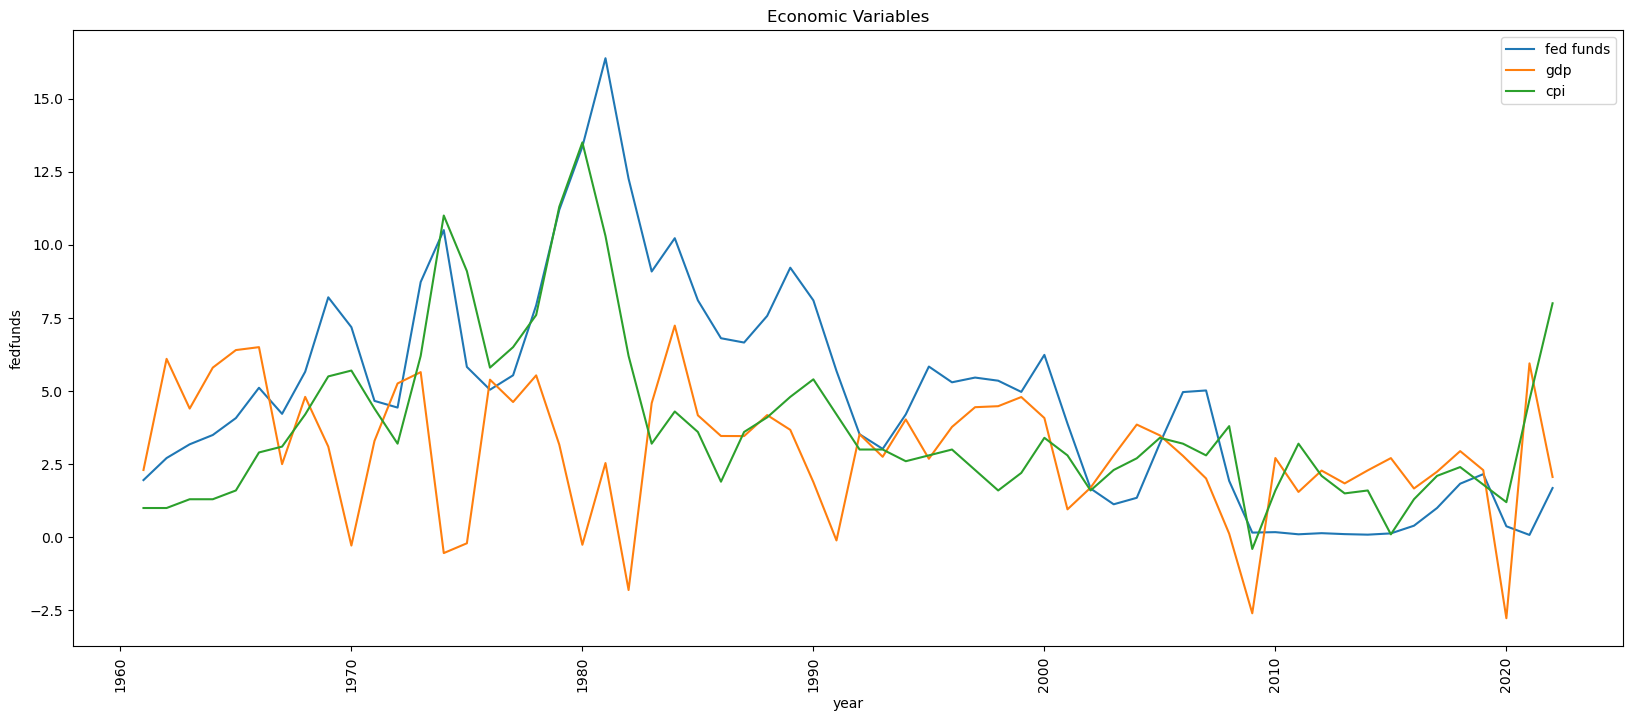

In [381]:
plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=merge_df, x='year', y='fedfunds' , label='fed funds')
sns.lineplot(data=merge_df, x='year', y='gdp' , label='gdp')
sns.lineplot(data=merge_df, x='year', y='cpi' , label='cpi')
plt.show()

# Plot the raw data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = fed_df.plot(ax=axs[0])
# Calculate % change and plot
ax = fed_df.rolling(window=5).aggregate(percent_change).plot(ax=axs[1])
ax.legend_.set_visible(False)

f_df = merge_df[merge_df['fedfunds'] > 7]
#f_df = f_df.resample('A').fillna(0, method='bfill')

plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=f_df, x='year', y='fedfunds' , label='fed funds')
sns.lineplot(data=f_df, x='year', y='gdp' , label='gdp')
sns.lineplot(data=f_df, x='year', y='cpi' , label='cpi')
plt.show()

In [382]:
long_df

,year,variable,rate
0,1961,fedfunds,1.955000
1,1962,fedfunds,2.708333
2,1963,fedfunds,3.178333
3,1964,fedfunds,3.496667
4,1965,fedfunds,4.075000
...,...,...,...
181,2018,cpi,2.400000
182,2019,cpi,1.800000
183,2020,cpi,1.200000
184,2021,cpi,4.700000


<Figure size 2000x800 with 0 Axes>

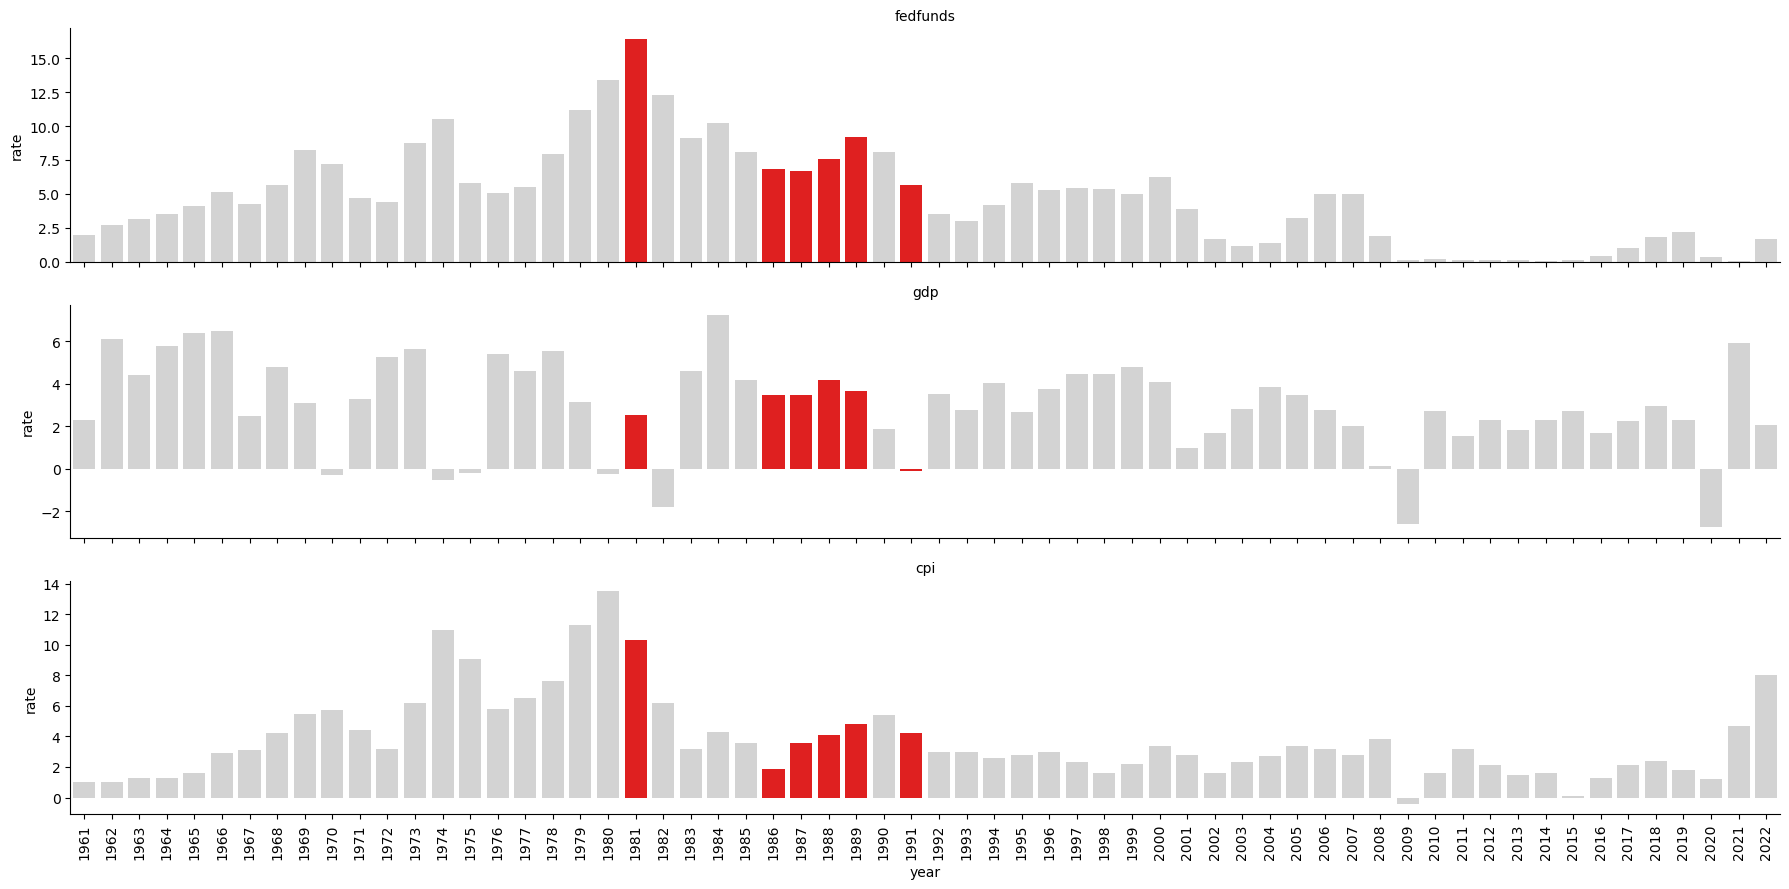

In [380]:
plt.figure(figsize=(20,8))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
#clrs = ['grey' if (x < max(rate)) else 'red' for x in value ]
g.map_dataframe(sns.barplot, y="rate", x='year', palette=clrs)

plt.show()

In [370]:
fed_df

,fedfunds
date,
1954,1.008333
1955,1.785000
1956,2.728333
1957,3.105000
1958,1.572500
...,...
2019,2.158333
2020,0.375833
2021,0.080000


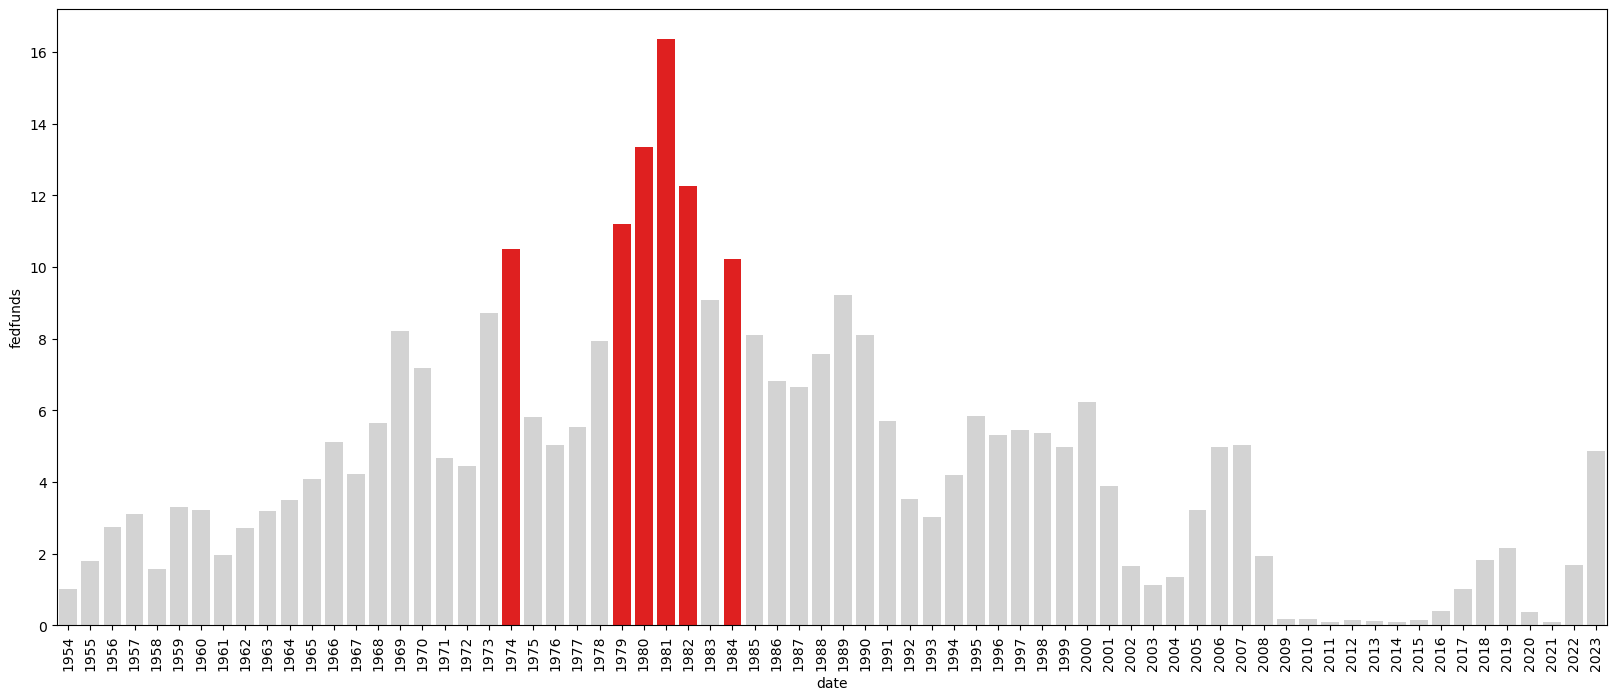

In [379]:
mean =  np.mean(fed_df.fedfunds)
sd = np.std(fed_df.fedfunds)

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
clrs = ['lightgrey' if (x < mean + 1.5*sd) else 'red' for x in fed_df.fedfunds]
sns.barplot(data=fed_df, x=fed_df.index, y='fedfunds' , label='fedfunds', palette=clrs)
plt.show()

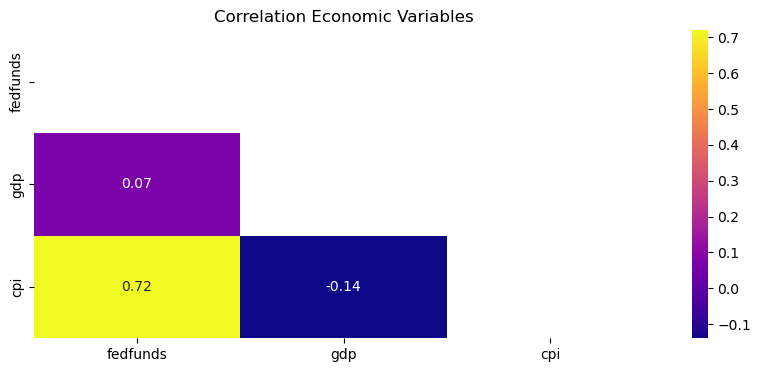

In [383]:
plt.figure(figsize=(10,4))
plt.title('Correlation Economic Variables')
mask = np.zeros_like(merge_df.drop(['year'], axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(merge_df.drop(['year'], axis=1).corr().round(2), annot=True, mask=mask, cmap="plasma")

plt.show()